In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
from problem import PROBLEM
import gc 
gc.enable()

In [2]:
problem_name = "dectiger"
planning_horizon = 5
gametype = "stackelberg"
sota = False
num_iterations = 3

PROBLEM.initialize(DecPOMDP(problem_name,horizon=planning_horizon))
from beliefSpace import BeliefSpace
from pbvi import PBVI



In [3]:
problem = PROBLEM.get_instance()
print(f"State size = {len(problem.STATES)}")
print(problem.JOINT_ACTIONS)
print(problem.JOINT_OBSERVATIONS)
for type,matrix in problem.REWARDS.items():
    print(type)
    print(f"leader :\n{matrix[0]}\nfollower : \n{matrix[1]}")


State size = 2
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3]
cooperative
leader :
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
follower : 
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
zerosum
leader :
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
follower : 
[[  2.   2.]
 [101.  -9.]
 [ -9. 101.]
 [101.  -9.]
 [ 50. -20.]
 [100. 100.]
 [ -9. 101.]
 [100. 100.]
 [-20.  50.]]
stackelberg
leader :
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
follower : 
[[-20. -87.]
 [-98.  -7.]
 [-66. -70.]
 [-73. -84.]
 [ -7. -88.]
 [-15.  -7.]
 [ 13. -32.]
 [-90. -26.]
 [-47. -97.]]


In [4]:
# check belief objects and expansion

bs = BeliefSpace(planning_horizon,density=0.001)
bs.expansion()
bs.print_network()
bs.print_belief_table()

	belief expansion done, belief space size = 8

  ∟ belief 0 : [0.5 0.5]
      ∟ action 0, observation 0 : belief 1
      ∟ action 0, observation 1 : belief 0
      ∟ action 0, observation 2 : belief 0
      ∟ action 0, observation 3 : belief 2
      ∟ action 1, observation 0 : belief 0
      ∟ action 1, observation 1 : belief 0
      ∟ action 1, observation 2 : belief 0
      ∟ action 1, observation 3 : belief 0
      ∟ action 2, observation 0 : belief 0
      ∟ action 2, observation 1 : belief 0
      ∟ action 2, observation 2 : belief 0
      ∟ action 2, observation 3 : belief 0
      ∟ action 3, observation 0 : belief 0
      ∟ action 3, observation 1 : belief 0
      ∟ action 3, observation 2 : belief 0
      ∟ action 3, observation 3 : belief 0
      ∟ action 4, observation 0 : belief 0
      ∟ action 4, observation 1 : belief 0
      ∟ action 4, observation 2 : belief 0
      ∟ action 4, observation 3 : belief 0
      ∟ action 5, observation 0 : belief 0
      ∟ action 5, observa

In [5]:
from experiment import Experiment
experiment = Experiment(planning_horizon,num_iterations)
experiment.run_single_experiment(planning_horizon,gametype="stackelberg",sota=False)


			 Solving stackelberg dectiger GAME Horizon 5 WITH SOTA = False  
iteration : 1
	belief expansion done, belief space size = 8


========== Backup at timestep 4 ==========
		belief id : 0 - 1 / 7 
		belief id : 1 - 2 / 7 
		belief id : 2 - 3 / 7 
		belief id : 3 - 4 / 7 
		belief id : 4 - 5 / 7 
		belief id : 5 - 6 / 7 
		belief id : 6 - 7 / 7 

========== Backup at timestep 3 ==========
		belief id : 0 - 1 / 7 
		belief id : 1 - 2 / 7 
		belief id : 2 - 3 / 7 
		belief id : 3 - 4 / 7 
		belief id : 4 - 5 / 7 
		belief id : 5 - 6 / 7 
		belief id : 6 - 7 / 7 

========== Backup at timestep 2 ==========
		belief id : 0 - 1 / 5 
		belief id : 1 - 2 / 5 
		belief id : 2 - 3 / 5 
		belief id : 3 - 4 / 5 
		belief id : 4 - 5 / 5 

========== Backup at timestep 1 ==========
		belief id : 0 - 1 / 3 
		belief id : 1 - 2 / 3 
		belief id : 2 - 3 / 3 

========== Backup at timestep 0 ==========
		belief id : 0 - 1 / 1 



================================================= END OF stackelberg GAME

([25.456872624133304, 25.456872624133304, 25.456872624133304],
 [array([-47.40188866, -35.        ]),
  array([-47.40188866, -35.        ]),
  array([-47.40188866, -35.        ])],
 [0.6217260360717773, 0.6520261764526367, 0.6006631851196289])

In [6]:
experiment.run_experiments()

			 Solving cooperative dectiger GAME Horizon 1 WITH SOTA = False  
iteration : 1
	belief expansion done, belief space size = 4


========== Backup at timestep 0 ==========
		belief id : 0 - 1 / 1 



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  9.0 , follower = [9. 9.]

iteration : 2
	belief expansion done, belief space size = 4


========== Backup at timestep 0 ==========
		belief id : 0 - 1 / 1 



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  9.0 , follower = [9. 9.]

iteration : 3
	belief expansion done, belief space size = 4


========== Backup at timestep 0 ==========
		belief id : 0 - 1 / 1 



===============================================

,gametype,SOTA,horizon,iterations,time,number_of_beliefs,leader values,follower values,density
0,cooperative,Stackelberg,1,3,"[0.029690027236938477, 0.025158166885375977, 0...",4,"[9.0, 9.0, 9.0]","[[9.0, 9.0], [9.0, 9.0], [9.0, 9.0]]",0.00001
1,cooperative,Stackelberg,2,3,"[0.09869575500488281, 0.0917048454284668, 0.09...",6,"[18.0, 18.0, 18.0]","[[18.0, 18.0], [18.0, 18.0], [18.0, 18.0]]",0.00001
2,cooperative,Stackelberg,3,3,"[0.2114729881286621, 0.21231412887573242, 0.21...",8,"[27.0, 27.0, 27.0]","[[27.0, 27.0], [27.0, 27.0], [27.0, 27.0]]",0.00001
3,cooperative,Stackelberg,4,3,"[0.4556620121002197, 0.40244388580322266, 0.40...",10,"[36.0, 36.0, 36.0]","[[36.0, 36.0], [36.0, 36.0], [36.0, 36.0]]",0.00001
4,cooperative,Stackelberg,5,3,"[0.6921019554138184, 0.6793968677520752, 0.748...",10,"[45.0, 45.0, 45.0]","[[45.0, 45.0], [45.0, 45.0], [45.0, 45.0]]",0.00001
5,cooperative,State of the Art,1,3,"[0.0029959678649902344, 0.002618074417114258, ...",4,"[9.0, 9.0, 9.0]","[[9.0, 9.0], [9.0, 9.0], [9.0, 9.0]]",0.00001
6,cooperative,State of the Art,2,3,"[0.012277841567993164, 0.010418176651000977, 0...",6,"[18.0, 18.0, 18.0]","[[18.0, 18.0], [18.0, 18.0], [18.0, 18.0]]",0.00001
7,cooperative,State of the Art,3,3,"[0.027356863021850586, 0.02676677703857422, 0....",8,"[27.0, 27.0, 27.0]","[[27.0, 27.0], [27.0, 27.0], [27.0, 27.0]]",0.00001
8,cooperative,State of the Art,4,3,"[0.05177617073059082, 0.07111620903015137, 0.0...",10,"[36.0, 36.0, 36.0]","[[36.0, 36.0], [36.0, 36.0], [36.0, 36.0]]",0.00001
9,cooperative,State of the Art,5,3,"[0.06743097305297852, 0.06987810134887695, 0.0...",10,"[45.0, 45.0, 45.0]","[[45.0, 45.0], [45.0, 45.0], [45.0, 45.0]]",0.00001


In [7]:
tables = experiment.generate_summary_table()
tables["zerosum"]

State of the Art                        Stackelberg               \
                        time leader value iteration        time leader value   
dectiger(1)         0.029759        -75.0         3    0.025375        -75.0   
dectiger(2)         0.119536       -150.0         3    0.117352       -150.0   
dectiger(3)         0.309373       -225.0         3    0.275135       -225.0   
dectiger(4)         0.503674       -300.0         3    0.517685       -300.0   
dectiger(5)         0.770415       -375.0         3    0.770640       -375.0   

                       
            iteration  
dectiger(1)         3  
dectiger(2)         3  
dectiger(3)         3  
dectiger(4)         3  
dectiger(5)         3

In [8]:
experiment.generate_comparison_tables()

cooperative                           \
            State of the Art Leader Value Stackelberg Leader Value   
dectiger(1)                           9.0                      9.0   
dectiger(2)                          18.0                     18.0   
dectiger(3)                          27.0                     27.0   
dectiger(4)                          36.0                     36.0   
dectiger(5)                          45.0                     45.0   

                                  zerosum                           \
            State of the Art Leader Value Stackelberg Leader Value   
dectiger(1)                         -75.0                    -75.0   
dectiger(2)                        -150.0                   -150.0   
dectiger(3)                        -225.0                   -225.0   
dectiger(4)                        -300.0                   -300.0   
dectiger(5)                        -375.0                   -375.0   

                              general-sum                           
            State of the Art Leader Value Stackelberg Leader Value  
dectiger(1)                      3.500000                 3.500000  
dectiger(2)                     10.486484                10.486484  
dectiger(3)                     14.860660                14.860660  
dectiger(4)                     21.270415                21.270415  
dectiger(5)                     25.456873                25.456873

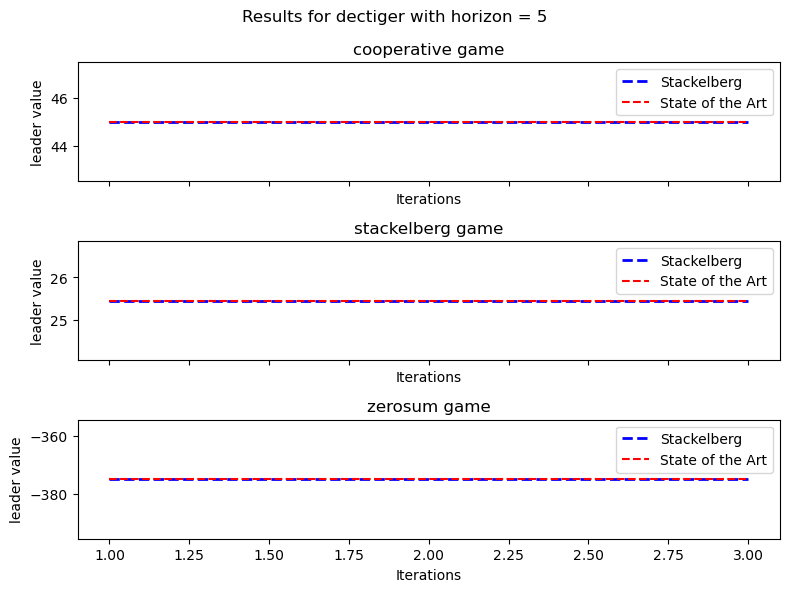

In [9]:
experiment.plots()

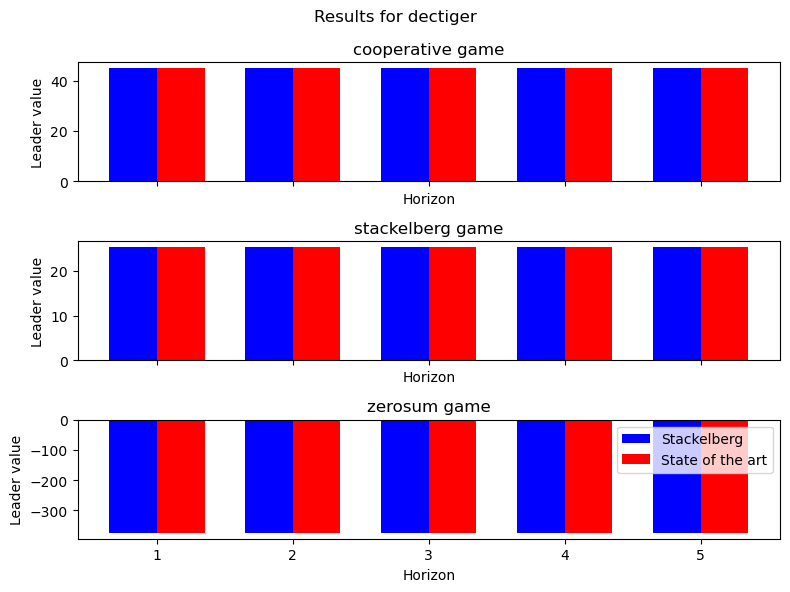

In [10]:
experiment.horizon_value_plot()